In [48]:
import pandas as pd

**Collection of Data**

In [49]:
legitimate_urls = pd.read_csv("datasets/legitimate-urls.csv")
phishing_urls = pd.read_csv("datasets/phishing-urls.csv")

In [51]:
legitimate_urls.head(10)
phishing_urls.head(15)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,1,0,1,1
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,1,0,1
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,1,0,0,1
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,1,0,1
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,1,0,0,1
5,dj00.co.vu,1,0,/css/,0,http,0,0,2,1,1,1,0,1,1,0,0
6,133.130.103.10,0,1,/21/logar/,0,http,0,2,0,1,0,1,0,1,0,0,1
7,httpssicredi.esy.es,0,0,/servico/sicredi/validarclientes/mobi/index.php,0,http,0,2,2,1,1,1,1,1,1,0,1
8,gamesaty.ga,0,0,/wp-content///yh/en/,0,http,1,0,2,1,0,1,0,1,0,0,1
9,luxuryupgradepro.com,0,0,/ymailNew/ymailNew/,0,http,0,0,0,0,0,1,0,1,0,0,1


In [52]:
phish_data = pd.concat([legitimate_urls, phishing_urls], ignore_index=True)


In [53]:
phish_data.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [54]:
phish_data.shape[1]

17

In [55]:
phish_data.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

#### Removing Unnecessary columns

In [56]:
phish_data = phish_data.drop(phish_data.columns[[0,3,5,16]],axis=1)

In [57]:
phish_data.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url'],
      dtype='object')

In [58]:
phish_data.shape[1]

13

#### Since we merged two dataframes top 1000 rows will have legitimate urls and bottom 1000 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [59]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
phish_data = phish_data.sample(frac=1).reset_index(drop=True)

#### Removing class variable from the dataset

In [60]:
no_label_phish_data = phish_data.drop('label',axis=1)
no_label_phish_data.columns
y = phish_data['label']


In [61]:
no_label_phish_data.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens',
       'statistical_report', 'tiny_url'],
      dtype='object')

In [62]:
no_label_phish_data.shape[1]

12

#### splitting the data into train data and test data

Dividing the data in the ratio of 70:30 [train_data:test_data]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(no_label_phish_data, y, test_size=0.30, random_state=100)

In [64]:
X_train.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens',
       'statistical_report', 'tiny_url'],
      dtype='object')

In [65]:
X_test.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens',
       'statistical_report', 'tiny_url'],
      dtype='object')

In [66]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

1410 605 1410 605


#### checking the split of labels in train and test data

The split should be in equal proportion for both classes

Phishing - 1

Legitimate - 0


In [67]:
#initially checking the split of labels_train data 
y_train.value_counts()


label
0    714
1    696
Name: count, dtype: int64

By above results it is shown that the split of both classes are almost equal!

Testing the same for labels of test data also

In [68]:
#checking the split for labels_test data
y_test.value_counts()

label
0    303
1    302
Name: count, dtype: int64

as the split is almost in equal proportion we can train the model

#### Creating the model and fitting the data into the model

creating the model with default parameters

In [69]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()

In [70]:
rd_clf.fit(X_train, y_train)


RandomForestClassifier()

In [71]:
X_train.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens',
       'statistical_report', 'tiny_url'],
      dtype='object')

In [72]:
X_test.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens',
       'statistical_report', 'tiny_url'],
      dtype='object')

#### Predicting the result for test data

In [73]:
y_pred = rd_clf.predict(X_test)

#### Creating confusion matrix and checking the accuracy

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
train_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion matrix: ")
print(conf_matrix)
print("Train Accuracy :")
print(train_accuracy)
print("Classification Report :")
print(classification_rep)

Confusion matrix: 
[[272  31]
 [ 84 218]]
Train Accuracy :
0.8099173553719008
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       303
           1       0.88      0.72      0.79       302

    accuracy                           0.81       605
   macro avg       0.82      0.81      0.81       605
weighted avg       0.82      0.81      0.81       605



In [34]:
import pickle
file_name = "RandomForestModel.sav"
pickle.dump(rd_clf, open(file_name,'wb'))

In [35]:
loaded_model = pickle.load(open(file_name, 'rb'))

loaded_model.predict('https://www.google.com')

c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'https://www.google.com'

### Improving the efficiency of model by specifying max_depth as well as number of tress 

In [28]:
custom_rd_clf = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=10000)

In [29]:
custom_rd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=10000, n_estimators=500)

In [30]:
custom_y_pred = custom_rd_clf.predict(X_test)

In [31]:

conf_matrix_2 = confusion_matrix(y_test, custom_y_pred)
train_accuracy_2 = accuracy_score(y_test, custom_y_pred)
print("Custom Confusion matrix: ")
print(conf_matrix_2)
print("Custom Train Accuracy :")
print(train_accuracy_2)

Custom Confusion matrix: 
[[268  34]
 [ 66 237]]
Custom Train Accuracy :
0.8347107438016529


## Feature Importance Plot

indices of columns : [ 5 12 10  4  6  8  7  2 11  3  0  1  9]

 ***Feature ranking: *** 

Feature name : Importance
1 URL_Length   :  0.2220977167898088 

2 web_traffic   :  0.1813946344178874 

3 statistical_report   :  0.15674794403230297 

4 Sub_domains   :  0.08587775065930446 

5 age_domain   :  0.0826709537379789 

6 domain_registration_length   :  0.0733923192475489 

7 dns_record   :  0.07239251473298632 

8 Prefix_suffix_separation   :  0.053906837386221824 

9 tiny_url   :  0.050576657893950806 

10 Redirection_//_symbol   :  0.007854837104193702 

11 Having_@_symbol   :  0.006199843833794633 

12 Having_IP   :  0.006025458013729143 

13 http_tokens   :  0.0008625321502922778 

**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****


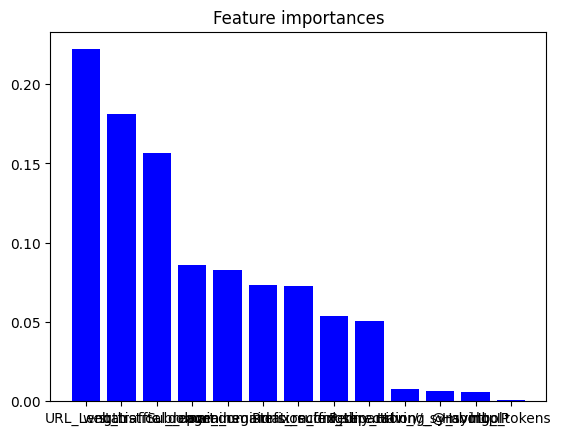

In [32]:
import matplotlib.pyplot as plt
import numpy as np

#feature_importances_ : array of shape = [n_features] ------ The feature importances (the higher, the more important the feature).

#feature_importances_  -- This method returns the quantified relative importance in the order the features were fed to the algorithm

importances = custom_rd_clf.feature_importances_

#std = np.std([tree.feature_importances_ for tree in custom_random_forest_classifier.estimators_],axis=0)   #[[[estimators_ :explaination ---  list of DecisionTreeClassifier ----- (The collection of fitted sub-estimators.)]]]

#To make the plot pretty, we’ll instead sort the features from most to least important.
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")

# Print the feature ranking
print("\n ***Feature ranking: *** \n")
print("Feature name : Importance")

for f in range(X_train.shape[1]):
    print(f"{f+1} {X_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
print("**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", align="center")   
#yerr=std[indices] -- this is another parameter that can be included if std is calculated above
#and also it gives error bar that's the reason we calculate std above. but here we are not making it plot.

plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])

plt.rcParams['figure.figsize'] = (35,15)  #this will increase the size of the plot
plt.show()

In [52]:
#click on the image to get clear view